<sub>Felix Becker and Mario Stanke, University of Greifswald, Germany</sub>
# A Simple Regression Neural Network

This notebook gives the first example of a neural network in action. To keep it simple we estimate data simulated from a univariate function.

## Generate an Artificial Dataset

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [2]:
def f(x):
    '''A simple one-dimensional function with a few extrema'''
    return np.sin(15 * x) + 9 * x - 9 * x**2

#### Simulate $(x, y)$ pairs as artificial data set

In [3]:
np.random.seed(1)
m = 100 # number of data points (examples)
x = np.linspace(0, 1, m) # equidistant in [0,1] (both boundaries included)
y_theoretical = f(x)     # the points on the curve 
sigma = 0.2
y = y_theoretical + sigma * np.random.randn(m) # observations have noise (normal with mean 0 and variance 0.01)

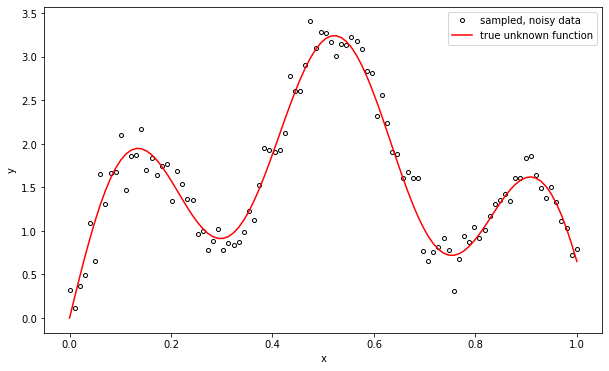

In [4]:
def plot_curve():
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.plot(x, y, 'ko', fillstyle = 'none', markersize = 4, label = "sampled, noisy data") # ko: blac(k) circle
    ax.plot(x, y_theoretical, 'r', label = "true unknown function")
    plt.xlabel("x")
    plt.ylabel("y")
    return ax

ax = plot_curve()
ax.legend();

## Create Neural Network Model  
We will use [```tf.keras```](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras), a high-level approach to neural network design and learning. The NN shall have 2 hidden layers with 8 neurons each. As activation functions we chose the logistic sigmoid function.

<img src="nn8-8.png" alt="network architecture" width="500"/>

In [5]:
tf.random.set_seed(13032021) # so we all get the same pseudorandom results

# a neural network is a stack of layers, in keras called "Sequential" model
model = tf.keras.models.Sequential() # so far the stack is empty, 0 layers

# add neural network layers one by one
# Dense is a fully connected layer, parametrized by a matrix of shape (input_units, output_units).
# The first number given in Dense is the number of output units, the number of input units is implicit.
# By default use_bias=True which adds output_units parameters for each layer
model.add(Dense(8, activation = tf.nn.sigmoid, input_dim = 1)) # input dimension only required for first layer
model.add(Dense(8, activation = tf.nn.sigmoid))
model.add(Dense(1))

model.summary()     # summarizes layers and parameters
model.get_weights() # a look under the 'hood' for teaching purposes

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


[array([[-0.79865354,  0.5466498 ,  0.6669332 ,  0.62540543, -0.37533638,
          0.6937871 ,  0.06552774, -0.36794874]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.25041604,  0.01067251,  0.47175223,  0.3738917 , -0.23048282,
         -0.57188976,  0.05249321, -0.16526303],
        [ 0.16256028, -0.5605735 ,  0.1562053 ,  0.19713122, -0.5375011 ,
         -0.46223062,  0.4636237 ,  0.06689852],
        [-0.4390909 , -0.38372093, -0.2369279 ,  0.0327521 ,  0.55165976,
          0.16594225, -0.46918958,  0.47585732],
        [-0.04807317,  0.54553086,  0.48319143, -0.3878767 ,  0.32638472,
          0.4896472 ,  0.39036041, -0.09716743],
        [ 0.40687686,  0.22357714, -0.40401566, -0.00617027, -0.32289866,
          0.566039  , -0.53660995,  0.21000767],
        [ 0.32662666,  0.06270462,  0.02037227, -0.17303774,  0.11844051,
         -0.04610521, -0.24551436, -0.3655355 ],
        [-0.14884245, -0.09618485, -0.11250558,  0.37559712, -0.5

The weights are randomly initializated. This is important (why?) as can be the parameters of the distribution. We postpone parameter initialization to the next notebook.

### Compile the model

In [6]:
# define the loss, optimization algorithm and prepare the model for gradient computation 
opti = tf.keras.optimizers.Adam(learning_rate = 0.1) # Adam is a popular method for stochastic gradient descent
model.compile(optimizer = opti, loss = 'mse') # mean squared error

### Train the parameters (learning)

In [7]:
# execute the actual training 
history = model.fit(x, y, epochs = 1000, verbose = 0) # takes a moment
# verbose = 1,2 gives more output

### Examine the learning progress

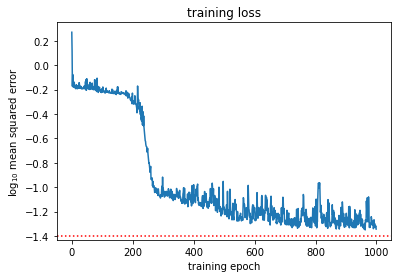

In [8]:
plt.plot(np.log10(history.history["loss"])); # one mse value per epoch
plt.title("training loss")
plt.xlabel("training epoch")
plt.ylabel(r"$\log_{10}$ mean squared error");
plt.axhline(y = np.log10(sigma**2), color = "red", linestyle = ":");

Observe that with our choice for the measurement noise the theoretical optimum for the mean squared error *on new data* is $10^{-2}$ (red dotted line).
### Use the model for predictions

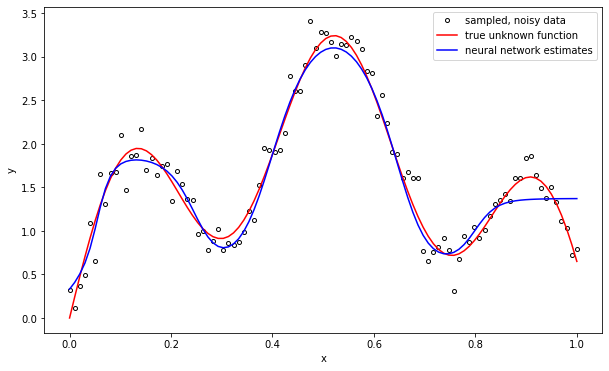

In [9]:
x_input = x.reshape((-1, 1)) # make x a matrix (with 1 column) as expected by predict
y_pred = model.predict(x_input)

ax = plot_curve()
ax.plot(x, y_pred, 'b', label = "neural network estimates") # (b)lue
ax.legend();

To summarize, we did:
- start with data points $x$ and corresponding observations $y$
- created a simple neural network using tensorflow/keras by stacking layers
- selected optimizer, learning rate and error function from a pool of standard choices
- fitted the model to the data and visualized the result